# 중고차 가격 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
file_url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/car.csv'
df = pd.read_csv(file_url) # 데이터셋 읽기

|name|year|selling_price|km_driven|fuel|seller_type|transmission|owner|mileage|engine|max_power|torque|seats|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|이름|생산년|판매가|주행거리|연료|판매자 유형|변속기|차주 변경 내역|마일리지(연비)|배기량|최대출력|토크|인승|

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info() # 결측치, 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


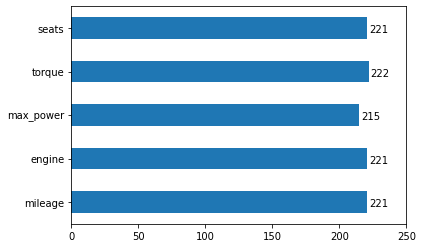

In [ ]:
#@title 결측치 
missing_value = df.isnull().sum()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
ax = missing_value[missing_value.gt(0)].plot(xlim=(0, 250), kind='barh')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() + 0.15))

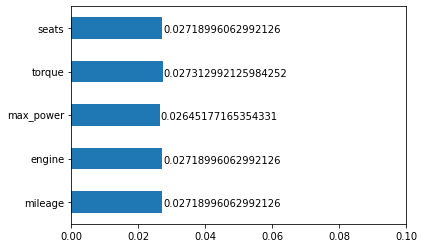

In [ ]:
missing_value = df.isnull().mean()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
ax = missing_value[missing_value.gt(0)].plot(xlim=(0, 0.1), kind='barh')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() + 0.15))

In [ ]:
#@title 단위 처리
# 단위 때문에 범주형(object 분류되는 데이터..)
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [ ]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,year,selling_price,km_driven,seats
count,"8,128.00","8,128.00","8,128.00","7,907.00"
mean,"2,013.80","638,271.81","69,819.51",5.42
std,4.04,"806,253.40","56,550.55",0.96
min,"1,983.00","29,999.00",1.00,2.00
25%,"2,011.00","254,999.00","35,000.00",5.00
50%,"2,015.00","450,000.00","60,000.00",5.00
75%,"2,017.00","675,000.00","98,000.00",5.00
max,"2,020.00","10,000,000.00","2,360,457.00",14.00


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


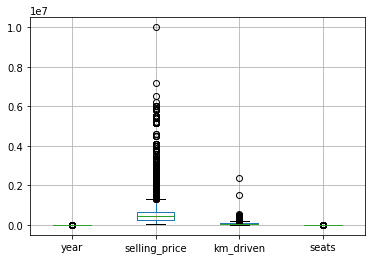

In [ ]:
df.boxplot()

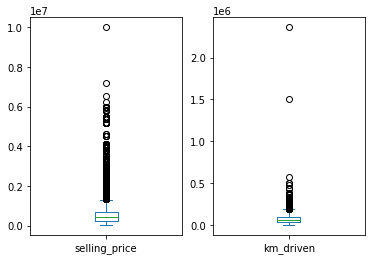

In [ ]:
# subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1 = df.selling_price.plot.box(ax=ax1)
ax2 = df.km_driven.plot.box(ax=ax2)
plt.show()

## 전처리

### 단위 변환

In [ ]:
df.describe(include=['O'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [ ]:
# mileage, engine, max-power -> (숫자) (단위)

In [ ]:
# df.(칼럼).str : (행단위로) 문자열을 처리하는 메소드(함수)들을 불러올 수 있음
# df.engine.str.split() # 리스트로 쪼개짐
df.engine.str.split(expand=True).head() # 열로 쪼개짐

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC


In [ ]:
df[['engine', 'engine_unit']] = df.engine.str.split(expand=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248,74 bhp,190Nm@ 2000rpm,5.00,CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.00,CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00,CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.00,CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00,CC


In [ ]:
df.engine.head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [ ]:
df.engine.astype('float32')

0      1,248.00
1      1,498.00
2      1,497.00
3      1,396.00
4      1,298.00
         ...   
8123   1,197.00
8124   1,493.00
8125   1,248.00
8126   1,396.00
8127   1,396.00
Name: engine, Length: 8128, dtype: float32

In [ ]:
df.engine = df.engine.astype('float32')
df.engine.head()

0   1,248.00
1   1,498.00
2   1,497.00
3   1,396.00
4   1,298.00
Name: engine, dtype: float32

In [ ]:
df.engine_unit.unique()

array(['CC', nan], dtype=object)

In [ ]:
df.drop('engine_unit', axis=1, inplace=True)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.max_power.head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [ ]:
df.max_power.str.split(expand=True).head()

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp


In [ ]:
df[['max_power', 'max_power_unit']] = df.max_power.str.split(expand=True)
df.max_power = df.max_power.astype('float32')

ValueError: ignored

In [ ]:
df.max_power[df.max_power == 'bhp']
# df.max_power.iloc[0]

'74'

In [ ]:
def handle_float(value):
    try:
        # num = float(value)
        # return num
        return float(value)
    except ValueError:
        return np.NaN

In [ ]:
df.max_power = df.max_power.apply(handle_float)

In [ ]:
df.max_power.head()

0    74.00
1   103.52
2    78.00
3    90.00
4    88.20
Name: max_power, dtype: float64

In [ ]:
df2 = pd.read_csv(file_url)
df2.max_power.head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [ ]:
# https://regexr.com/
df2.max_power.str.extract('([\d\.]+)').astype('float').head()

,0
0,74.00
1,103.52
2,78.00
3,90.00
4,88.20


In [ ]:
df.max_power_unit.unique()

array(['bhp', nan, None], dtype=object)

In [ ]:
df.drop('max_power_unit', axis=1, inplace=True)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.mileage.unique() # kmpl (km/l), km/kg -> 연비

In [ ]:
df[['mileage', 'mileage_unit']] = df.mileage.str.split(expand=True)
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'mileage_unit'],
      dtype='object')

In [ ]:
df[['mileage', 'mileage_unit']].head()

,mileage,mileage_unit
0,23.4,kmpl
1,21.14,kmpl
2,17.7,kmpl
3,23.0,kmpl
4,16.1,kmpl


In [ ]:
df.mileage = df.mileage.astype('float32')
df.mileage.head()

0   23.40
1   21.14
2   17.70
3   23.00
4   16.10
Name: mileage, dtype: float32

In [ ]:
df.mileage_unit.unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [ ]:
df.fuel.unique() # Petrol, Diesel -> L / LPG, CNG -> KG

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
fuels = {
    'Petrol': 80.43,
    'Diesel': 73.56,
    'LPG': 40.85,
    'CNG': 44.23
}

# apply(function, axis=1) -> 행의 데이터를 다 쓸 수 있다
def handle_mileage(x):
    return x.mileage / fuels[x.fuel]

In [ ]:
df.mileage = df.apply(handle_mileage, axis=1)
df.mileage.head()

0   0.32
1   0.29
2   0.22
3   0.31
4   0.20
Name: mileage, dtype: float64

In [ ]:
df.drop('mileage_unit', axis=1, inplace=True)
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.torque.head()

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [ ]:
df.torque.unique()

In [ ]:
df.torque = df.torque.str.upper()

In [ ]:
# 단위를 뽑아내기 위해서 사용하는 함수 (torque 열)
def handle_torque_unit(x):
    if 'NM' in str(x): # '문자열A' in '문자열B' -> 문자열 B에 A를 포함하고 있나요? - T/F
        return 'Nm' # Nm -> 단위
    # elif 'KGM' in str(x):
    if 'KGM' in str(x): # x -> KGM? => kgm 반환값
        return 'kgm'
    # ---
    # ? -> None (return None)

In [ ]:
df['torque_unit'] = df.torque.apply(handle_torque_unit)
df.torque_unit.unique()

array(['Nm', 'kgm', None], dtype=object)

In [ ]:
df[df.torque_unit.isna()].torque.unique() # Nm 100보다 큰 값, kgm 100미만

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [ ]:
df.torque_unit.fillna('Nm', inplace=True)

In [ ]:
df.torque_unit.unique()

array(['Nm', 'kgm'], dtype=object)

In [ ]:
df.torque.head()

0              190NM@ 2000RPM
1         250NM@ 1500-2500RPM
2       12.7@ 2,700(KGM@ RPM)
3    22.4 KGM AT 1750-2750RPM
4       11.5@ 4,500(KGM@ RPM)
Name: torque, dtype: object

In [ ]:
# ([0-9\.]+) find(find_one) / find_all
# str.extract = 맨처음 검색되는 첫번째만. 2개 이상일 경우에는 1번째만. 없으면? None. -> nan.
# str.extract_all = 리스트(여러개) []
df.torque.str.extract('([\d\.]+)').astype('float64')

,0
0,190.00
1,250.00
2,12.70
3,22.40
4,11.50
...,...
8123,113.70
8124,24.00
8125,190.00
8126,140.00


In [ ]:
df.torque = df.torque.str.extract('([\d\.]+)').astype('float64')
df.torque.head()

0   190.00
1   250.00
2    12.70
3    22.40
4    11.50
Name: torque, dtype: float64

In [ ]:
df.torque_unit.unique()
# 9.8066 kgm -> nm

array(['Nm', 'kgm'], dtype=object)

In [ ]:
# 단위 변환
def handle_torque_trans(x):
    return x.torque * 9.8066 if x.torque_unit == 'kgm' else x.torque

df.torque = df.apply(handle_torque_trans, axis=1)

In [ ]:
df.torque.head()

0   190.00
1   250.00
2   124.54
3   219.67
4   112.78
Name: torque, dtype: float64

In [ ]:
df.drop('torque_unit', axis=1, inplace=True)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.name

In [ ]:
# 맨 첫 단어만.
df.name = df.name.str.split(expand=True)[0]
df.name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
df.name = df.name.replace('Land', 'Land Rover')
df.name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

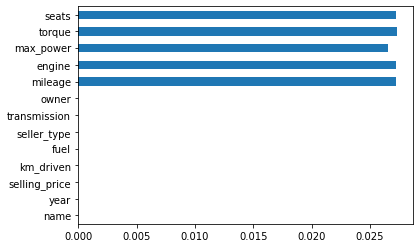

In [ ]:
# 결측치의 평균
df.isna().mean()
# df.isna().mean().plot.barh()

In [ ]:
df.dropna(inplace=True)
len(df) # 평균치 치환도 가능

7906

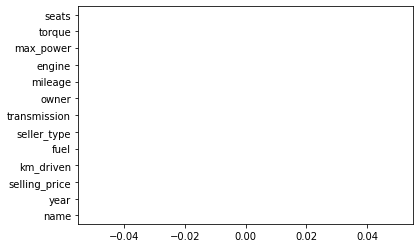

In [ ]:
df.isna().mean().plot.barh()

## 범주형 변수 변환

In [ ]:
df.describe(include=['O'])

,name,fuel,seller_type,transmission,owner
count,7906,7906,7906,7906,7906
unique,31,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,2367,4299,6563,6865,5215


In [ ]:
df = pd.get_dummies(df,
                    columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'],
                    drop_first=True)
df

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.32,"1,248.00",74.00,190.00,5.00,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.29,"1,498.00",103.52,250.00,5.00,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.22,"1,497.00",78.00,124.54,5.00,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.31,"1,396.00",90.00,219.67,5.00,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.20,"1,298.00",88.20,112.78,5.00,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.23,"1,197.00",82.85,113.70,5.00,0,0,...,0,0,1,1,0,1,0,0,0,0
8124,2007,135000,119000,0.23,"1,493.00",110.00,235.36,5.00,0,0,...,1,0,0,1,0,1,1,0,0,0
8125,2009,382000,120000,0.26,"1,248.00",73.90,190.00,5.00,0,0,...,1,0,0,1,0,1,0,0,0,0
8126,2013,290000,25000,0.32,"1,396.00",70.00,140.00,5.00,0,0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage                       7906 non-null   float64
 4   engine                        7906 non-null   float32
 5   max_power                     7906 non-null   float64
 6   torque                        7906 non-null   float64
 7   seats                         7906 non-null   float64
 8   name_Ashok                    7906 non-null   uint8  
 9   name_Audi                     7906 non-null   uint8  
 10  name_BMW                      7906 non-null   uint8  
 11  name_Chevrolet                7906 non-null   uint8  
 12  name_Daewoo                   7906 non-null   uint8  
 13  nam

## 훈련셋 & 시험셋

In [ ]:
from sklearn.model_selection import train_test_split

# 중고차의 판매가격 -> selling_price (y)
X = df.drop('selling_price', axis=1)
y = df.selling_price
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

In [ ]:
# 연속형 변수 : RandomForestRegressor
# 범주형 변수 : RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=100)

In [ ]:
model.fit(X_train, y_train) # 학습
train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

In [ ]:
# 분류하는 문제 : accurancy
# 수치 예측 -> RMSE
from sklearn.metrics import mean_squared_error
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", mean_squared_error(y_train, train_pred, squared=False),
    "test_rmse : ", mean_squared_error(y_test, test_pred) ** 0.5 #1/2
)

train_rmse :  53531.41548125947 test_rmse :  131855.18391308116


## K-Fold 교차검증
* 교차검증 : `train_test_split` 훈련셋 & 시험셋 -> random_state. ??? 1버전의 훈련셋?<br> 다양한 훈련셋/시험셋을 통해서 모델의 신뢰성을 높이기 위한 평가 과정
* K-폴드 교차검증 : 데이터를 K개를 쪼개어 그 중에 하나를 시험셋으로 선택하는 과정을 반복 -> 평균치.

| A | B | C | D | E |
|-|-|-|-|-|
|훈|훈|훈|훈|시|
|훈|훈|훈|시|훈|
|훈|훈|시|훈|훈|
|훈|시|훈|훈|훈|
|시|훈|훈|훈|훈|

=> accurance_score? rmse? => 평균

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127],
           dtype='int64', length=7906)

In [ ]:
# df.reset_index()
# df.reset_index(drop=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.index

RangeIndex(start=0, stop=7906, step=1)

In [ ]:
# 한계 : test_train_split? -> 랜덤인데? 1번만한다 -> 어? 다른 조합이면 값이 다를까?
# 여러 조합으로 해봐야한다
# 훈.훈.훈.훈.시 / 훈.훈.훈.시.훈 / (조합을 다양하게 해봐서 해당 지표들의 평균?)
# K폴드 교차검증 (여러개의 시험셋/훈련셋을 비교해보자 -> 검증)
kf = KFold(n_splits=5) # KFold 객체

In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
for i, j in kf.split(X):
    print(f"i : {i}") # 훈련셋의 인덱스
    print(f"j : {j}") # 시험셋의 인덱스

i : [1582 1583 1584 ... 7903 7904 7905]
j : [   0    1    2 ... 1579 1580 1581]
i : [   0    1    2 ... 7903 7904 7905]
j : [1582 1583 1584 ... 3160 3161 3162]
i : [   0    1    2 ... 7903 7904 7905]
j : [3163 3164 3165 ... 4741 4742 4743]
i : [   0    1    2 ... 7903 7904 7905]
j : [4744 4745 4746 ... 6322 6323 6324]
i : [   0    1    2 ... 6322 6323 6324]
j : [6325 6326 6327 ... 7903 7904 7905]


In [ ]:
train_rmse_total = []
test_rmse_total = []

for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
    X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
    y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

    model = RandomForestRegressor(random_state=100)
    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [ ]:
train_rmse_total, test_rmse_total

([50825.5556350298,
  58854.04054344074,
  57904.19615940739,
  56218.23740006373,
  58967.150857632456],
 [160158.9215153142,
  135224.1522128581,
  122115.51562163295,
  154739.53615967772,
  142444.82040271905])

In [ ]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

train_rmse :  56553.836119114814 test_rmse :  142936.58918244042


## 하이퍼 패러미터 튜닝
* n_estimators (기본값 100): 랜덤 포레슽를 구성하는 결정트리 개수
    - 너무 많거나 너무 적으면? : 성능과 예측력에 영향
* max_depth (결정 트리 유사) : 각 트리의 최대 깊이(단계)
    - 오버피팅/언더피팅 : max_depth 커지면? - 오버피팅, 작으면 - 언더피팅(학습이 잘 안됐다.)
* min_samples_split : 이 숫자보다 작으면 더 이상 나누지 않음
* min_samples_leaf : (최종적으로 나눠질) 최소 몇 개의 데이터가 노드에 속하게 할 것인지
* n_jobs : 병렬 처리 시 사용할 CPU 코어 수

In [ ]:
train_rmse_total = []
test_rmse_total = []

for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
    X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
    y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

    model = RandomForestRegressor(
        n_estimators = 300,
        max_depth = 50,
        min_samples_split = 5,
        min_samples_leaf = 1,
        n_jobs= -1,
        random_state = 100
    )
    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [ ]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

train_rmse :  66762.84568886801 test_rmse :  142205.83441414658
